<a href="https://colab.research.google.com/github/junanote/test_deeplearning/blob/master/Notescale_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
note_seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [ ]:
note_seq[0:5]

['g8', 'e8', 'e4', 'f8', 'd8']

In [ ]:
note_seq[0:5], note_seq[1:6], note_seq[2:7]


(['g8', 'e8', 'e4', 'f8', 'd8'],
 ['e8', 'e4', 'f8', 'd8', 'd4'],
 ['e4', 'f8', 'd8', 'd4', 'c8'])

In [ ]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}


In [ ]:
len(note_seq),range(len(note_seq)-5) #[5, 10, 15.....]

(54, range(0, 49))

In [ ]:
code2idx['g8']

11

In [ ]:
dataset = list()
for i in range(len(note_seq)-5):
  subset = note_seq[i:i+5]
  items = list()
  print(subset)
  for item in subset:
    #print(code2idx[item])
     items.append(code2idx[item])
    #print(items)
  dataset.append(items)
   
  print(dataset)

In [ ]:
import numpy as np
datasets = np.array(dataset)

In [ ]:
x_train = datasets[:,0:4]
x_train.shape, #x_train


((49, 4),)

In [ ]:
y_train = datasets[:,4]
y_train.shape,

((49,),)

In [ ]:
len(code2idx)

14

In [ ]:
x_train = x_train / 13 #len(code2idx) 정규화를 시킴 (맥시멈값으로 나눈다)
x_train[4]

array([0.61538462, 0.07692308, 0.53846154, 0.61538462])

# make model

In [ ]:
 import tensorflow as tf


In [ ]:
x_train.shape, x_train[2] # --> tonsorfolw type(tensor)(50,4,1) # 순수한 넘파이의 모습 scale

((49, 4), array([0.15384615, 0.76923077, 0.61538462, 0.07692308]))

In [ ]:
X_train = np.reshape(x_train,(-1, 4, 1)) # tensor
X_train.shape, X_train[2] 

((49, 4, 1), array([[0.15384615],
        [0.76923077],
        [0.61538462],
        [0.07692308]]))

In [ ]:
np.unique(y_train)   # 악보.. 계명상 11개, code2idx를보며 14

array([ 1,  2,  3,  4,  7,  8,  9, 10, 11])

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(4,1)))
model.add(tf.keras.layers.LSTM(128)) # input and hidden layer 타임시리즈(batch_sixe, timesteps, input_dim)-->(rows, cols, 1)
model.add(tf.keras.layers.Dense(13, activation='softmax')) # ouptut layer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) # gadget

In [ ]:
hist = model.fit(X_train, y_train, epochs=100, batch_size=5)

Epoch 1/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3642 - acc: 0.8571
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3492 - acc: 0.8571
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3556 - acc: 0.8367
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3589 - acc: 0.8367
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4084 - acc: 0.8571
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3705 - acc: 0.8367
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3404 - acc: 0.8367
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3505 - acc: 0.8571
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3466 - acc: 0.8980
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3576 - acc: 0.8776
Epoch 11/100
10/10 [==============================] - 0s 5m

# evaluate

In [ ]:
model.evaluate(X_train, y_train)

2/2 [==============================] - 0s 8ms/step - loss: 0.3121 - acc: 0.8980


[0.3120502829551697, 0.8979591727256775]

In [ ]:
X_train[0:1]

array([[[0.84615385],
        [0.69230769],
        [0.15384615],
        [0.76923077]]])

In [145]:
first = 0.84615385
second = 0.69230769
third = 0.15384615
fourth = 0.76923077

In [149]:
 pred = model.predict([[[first],[second],[third],[fourth]]])
 pred

array([[2.7688843e-10, 2.7922731e-10, 8.7164850e-08, 2.3650608e-05,
        8.7648577e-06, 1.3071852e-10, 2.3006097e-10, 5.4883953e-05,
        9.9123222e-01, 5.8854548e-03, 2.7949724e-03, 4.4736506e-08,
        2.2980791e-10]], dtype=float32)

In [150]:
pred = model.predict(X_train[0:1])  

In [151]:
np.argmax(pred)

8

In [152]:
import matplotlib.pyplot as plt

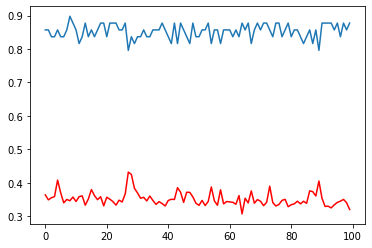

In [160]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['loss'],'r-')
plt.show()